<a href="https://colab.research.google.com/github/santhoshi-h/datasets/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = 'https://lib.stat.cmu.edu/datasets/boston'
raw_data = pd.read_csv(url, sep='\t', lineterminator='\r', header=None)

# Display the first few rows of raw data
raw_data.head(20)



,0
0,"The Boston house-price data of Harrison, D. a..."


      CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.02731  0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
1  0.02729  0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
2  0.03237  0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
3  0.06905  0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   
4  0.02985  0.0   2.18   0.0  0.458  6.430  58.7  6.0622  3.0  222.0     18.7   

        B  LSTAT  MEDV  
0  396.90   9.14  21.6  
1  392.83   4.03  34.7  
2  394.63   2.94  33.4  
3  396.90   5.33  36.2  
4  394.12   5.21  28.7  


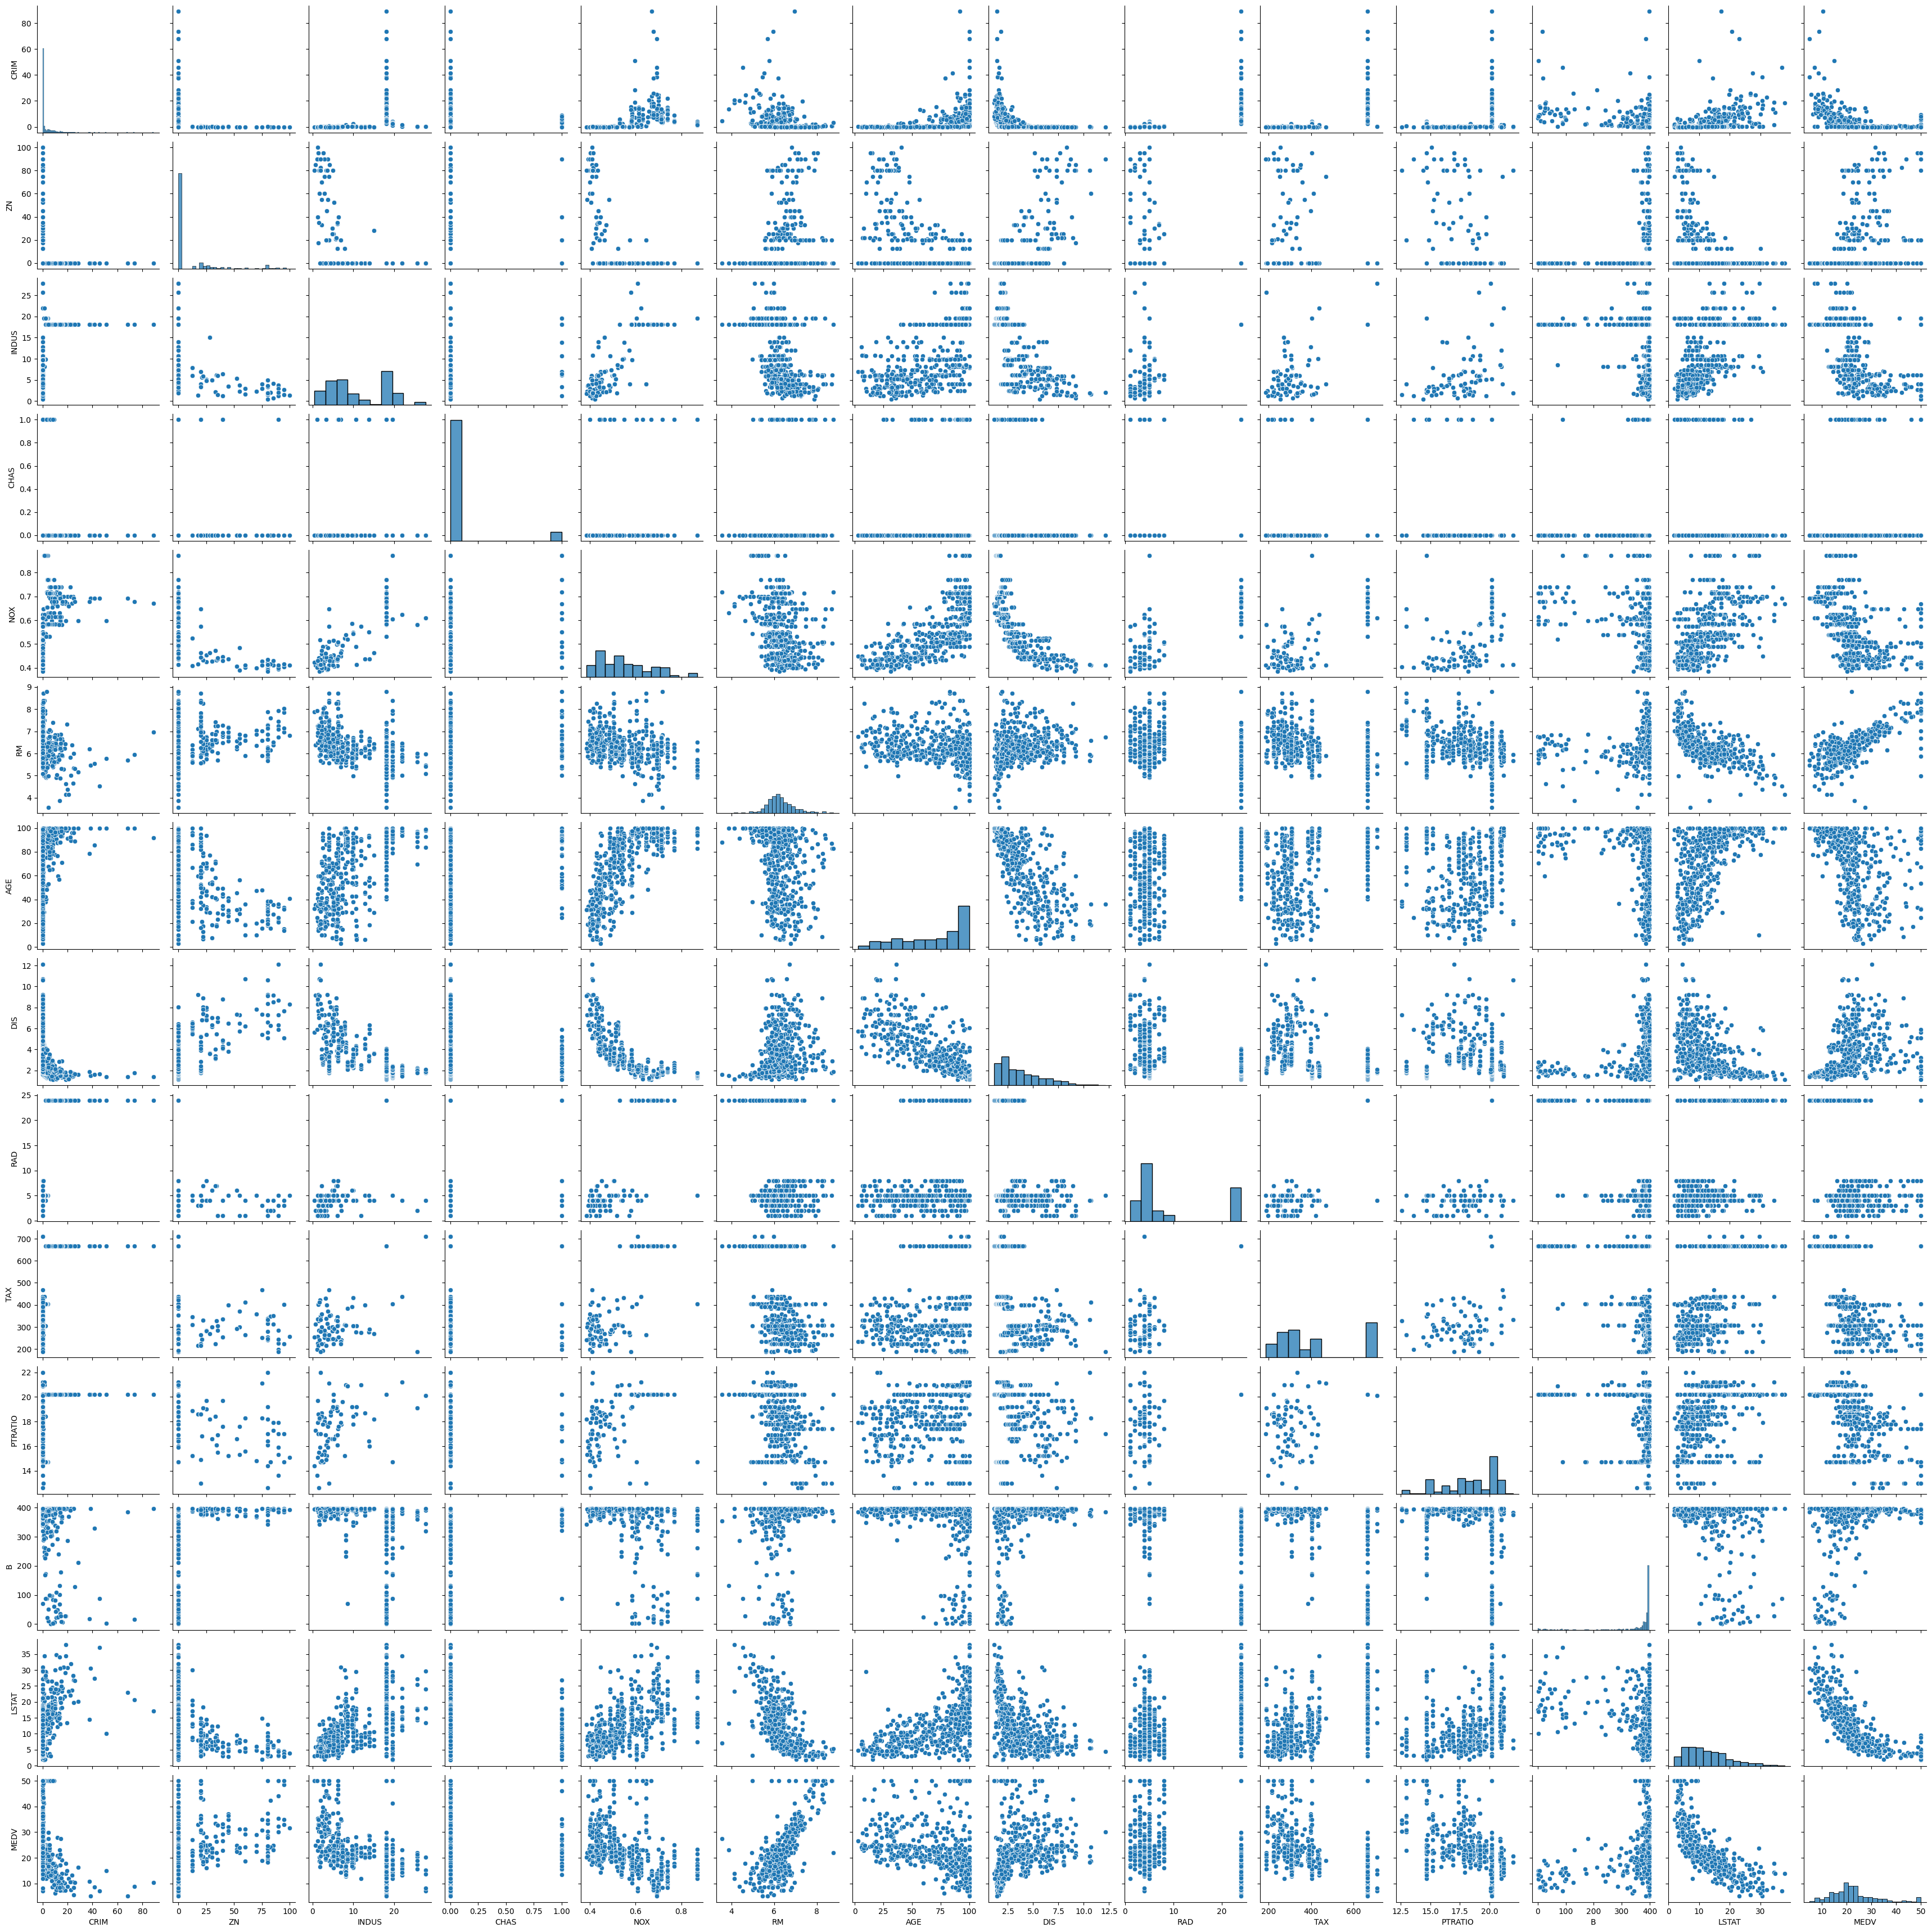

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
Root Mean Squared Error: 4.402163231428039
R^2 Score: 0.6522201888666164


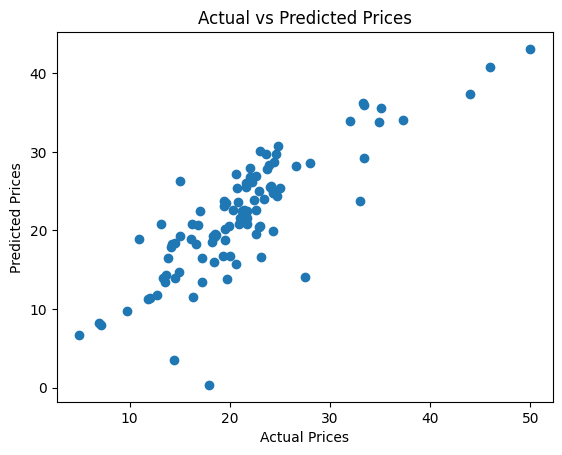

In [3]:
# Load raw data as list of lines
raw_data = pd.read_csv(url, sep='\t', header=None).values.tolist()
# Flatten the list and filter out any empty strings
raw_data = [item for sublist in raw_data for item in sublist if isinstance(item, str)]

# Convert to numpy array and reshape
raw_data = np.array(raw_data)
raw_data = raw_data[22:]  # Remove the header part
raw_data = np.char.split(raw_data)
raw_data = np.array([item for sublist in raw_data for item in sublist])
raw_data = raw_data.astype(float).reshape(-1, 14)

# Define column names
columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM",
    "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

# Create DataFrame
df = pd.DataFrame(raw_data, columns=columns)


# The dataset is stored in a non-standard format, so some preprocessing is needed
# data = np.hstack([raw_df.values[::2, :-1], raw_df.values[1::2, :]])
# #df = pd.DataFrame(data, columns=column_names)

# Display the first few rows of the dataframe
print(df.head())
# Exploratory Data Analysis (optional)
sns.pairplot(df)
plt.show()

# Check for missing values
print(df.isnull().sum())

# Define features and target variable
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# Plotting the results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()
